In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
df=pd.read_csv("TASK2- DATA(2).csv",encoding='latin-1')
useless_col=['Minute','At_score','Goal_assist']
df=df.drop(useless_col , axis=1)
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Type
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,Direct free kick
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,NaN
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,Header
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,Right-footed shot
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,Left-footed shot


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1511 non-null   object
 1   Competition       1497 non-null   object
 2   Matchday          1507 non-null   object
 3   Date              1498 non-null   object
 4   Venue             1504 non-null   object
 5   Club              1508 non-null   object
 6   Opponent          1500 non-null   object
 7   Result            1500 non-null   object
 8   Playing_Position  1435 non-null   object
 9   Type              1475 non-null   object
dtypes: object(10)
memory usage: 122.3+ KB


In [9]:
print('Shape of the data:',df.shape)
print("****************************")
print('Columns of the data:',df.columns)
print("****************************")
print('Number of duplicated values:',df.duplicated().sum())


Shape of the data: (1564, 10)
****************************
Columns of the data: Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Type'],
      dtype='object')
****************************
Number of duplicated values: 256


In [11]:
df.isnull().sum() #we can see that goal_assist has much more null values than rest of the df (abt 1/3 null values ) thus favouring it to be dropped 

Season               53
Competition          67
Matchday             57
Date                 66
Venue                60
Club                 56
Opponent             64
Result               64
Playing_Position    129
Type                 89
dtype: int64

In [8]:
df[['home_score', 'away_score']] = df['Result'].str.split(':', expand=True)
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Type,home_score,away_score
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,Direct free kick,2,O1
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,NaN,1,OO
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,Header,6,O1
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,Right-footed shot,6,O2
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,Left-footed shot,1,1


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1511 non-null   object
 1   Competition       1497 non-null   object
 2   Matchday          1507 non-null   object
 3   Date              1498 non-null   object
 4   Venue             1504 non-null   object
 5   Club              1508 non-null   object
 6   Opponent          1500 non-null   object
 7   Result            1500 non-null   object
 8   Playing_Position  1435 non-null   object
 9   Type              1475 non-null   object
 10  home_score        1500 non-null   object
 11  away_score        1500 non-null   object
dtypes: object(12)
memory usage: 146.8+ KB


In [10]:
# Function to remove 'O' and convert to integer, handling errors
def remove_O_and_convert(score):
    return score.str.replace('O', '')

# Apply the function to the home_score and away_score columns
df['home_score'] = remove_O_and_convert(df['home_score'])
df['away_score'] = remove_O_and_convert(df['away_score'])

df.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Type,home_score,away_score
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,Direct free kick,2,1
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,NaN,1,
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,Header,6,1
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,Right-footed shot,6,2
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,Left-footed shot,1,1
5,15/16,UEFA Champions League,last 16,O3-O8-16,H,Real Madrid,AS Roma,2:OO,CF,Right-footed shot,2,
6,15/16,LaLiga,3O,3/2O/16,H,Real Madrid,Sevilla FC,4:OO,LW,Left-footed shot,4,
7,15/16,LaLiga,3,O9-12-15,A,Real Madrid,RCD Espanyol Barcelona,O:O6,LW,Right-footed shot,,6
8,NaN,NaN,NaN,11/2O/1O,NaN,Real Madrid,Ajax Amsterdam,NaN,NaN,NaN,NaN,NaN
9,13/14,LaLiga,24,2/15/14,H,FC Barcelona,Rayo Vallecano,6:OO,CF,Left-footed shot,6,


In [10]:
df['home_score'].fillna(0, inplace=True)
df['away_score'].fillna(0, inplace=True)
df.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Type,home_score,away_score
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,Direct free kick,2,1
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,NaN,1,
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,Header,6,1
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,Right-footed shot,6,2
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,Left-footed shot,1,1
5,15/16,UEFA Champions League,last 16,O3-O8-16,H,Real Madrid,AS Roma,2:OO,CF,Right-footed shot,2,
6,15/16,LaLiga,3O,3/2O/16,H,Real Madrid,Sevilla FC,4:OO,LW,Left-footed shot,4,
7,15/16,LaLiga,3,O9-12-15,A,Real Madrid,RCD Espanyol Barcelona,O:O6,LW,Right-footed shot,,6
8,NaN,NaN,NaN,11/2O/1O,NaN,Real Madrid,Ajax Amsterdam,NaN,NaN,NaN,0,0
9,13/14,LaLiga,24,2/15/14,H,FC Barcelona,Rayo Vallecano,6:OO,CF,Left-footed shot,6,


In [11]:
df['home_score'] = df['home_score'].replace('', '0')
df['away_score'] = df['away_score'].replace('', '0')
df.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Type,home_score,away_score
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,Direct free kick,2,1
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,NaN,1,0
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,Header,6,1
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,Right-footed shot,6,2
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,Left-footed shot,1,1
5,15/16,UEFA Champions League,last 16,O3-O8-16,H,Real Madrid,AS Roma,2:OO,CF,Right-footed shot,2,0
6,15/16,LaLiga,3O,3/2O/16,H,Real Madrid,Sevilla FC,4:OO,LW,Left-footed shot,4,0
7,15/16,LaLiga,3,O9-12-15,A,Real Madrid,RCD Espanyol Barcelona,O:O6,LW,Right-footed shot,0,6
8,NaN,NaN,NaN,11/2O/1O,NaN,Real Madrid,Ajax Amsterdam,NaN,NaN,NaN,NaN,NaN
9,13/14,LaLiga,24,2/15/14,H,FC Barcelona,Rayo Vallecano,6:OO,CF,Left-footed shot,6,0


In [12]:
df['home_score'].fillna(0, inplace=True)
df['away_score'].fillna(0, inplace=True)
df.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Type,home_score,away_score
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,Direct free kick,2,1
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,NaN,1,0
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,Header,6,1
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,Right-footed shot,6,2
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,Left-footed shot,1,1
5,15/16,UEFA Champions League,last 16,O3-O8-16,H,Real Madrid,AS Roma,2:OO,CF,Right-footed shot,2,0
6,15/16,LaLiga,3O,3/2O/16,H,Real Madrid,Sevilla FC,4:OO,LW,Left-footed shot,4,0
7,15/16,LaLiga,3,O9-12-15,A,Real Madrid,RCD Espanyol Barcelona,O:O6,LW,Right-footed shot,0,6
8,NaN,NaN,NaN,11/2O/1O,NaN,Real Madrid,Ajax Amsterdam,NaN,NaN,NaN,0,0
9,13/14,LaLiga,24,2/15/14,H,FC Barcelona,Rayo Vallecano,6:OO,CF,Left-footed shot,6,0


In [13]:
def determine_winner(row):
    if row['home_score'] > row['away_score']:
        return row['Club']
    elif row['home_score'] < row['away_score']:
        return row['Opponent']
    else:
        return 'Draw'

df['Winning_Team'] = df.apply(determine_winner, axis=1)
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Type,home_score,away_score,Winning_Team
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,Direct free kick,2,1,FC Barcelona
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,NaN,1,0,FC Barcelona
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,Header,6,1,FC Barcelona
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,Right-footed shot,6,2,Real Madrid
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,Left-footed shot,1,1,Draw


In [28]:
def determine_winner(row):
    if row['home_score'] > row['away_score']:
        return 'Home'
    elif row['home_score'] < row['away_score']:
        return 'Away'
    else:
        return 'Draw'

df['winning'] = df.apply(determine_winner, axis=1)
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Type,home_score,away_score,Winning_Team,winning
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,Direct free kick,2,1,FC Barcelona,Home
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,NaN,1,0,FC Barcelona,Home
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,Header,6,1,FC Barcelona,Home
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,Right-footed shot,6,2,Real Madrid,Home
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,Left-footed shot,1,1,Draw,Draw


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1511 non-null   object
 1   Competition       1497 non-null   object
 2   Matchday          1507 non-null   object
 3   Date              1498 non-null   object
 4   Venue             1504 non-null   object
 5   Club              1508 non-null   object
 6   Opponent          1500 non-null   object
 7   Result            1500 non-null   object
 8   Playing_Position  1435 non-null   object
 9   Type              1475 non-null   object
 10  home_score        1564 non-null   object
 11  away_score        1564 non-null   object
 12  Winning_Team      1540 non-null   object
 13  winning           1564 non-null   object
dtypes: object(14)
memory usage: 171.2+ KB


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


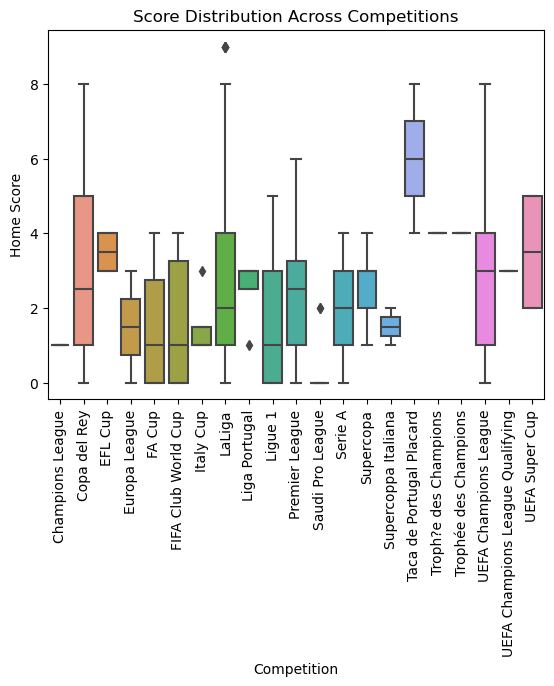

In [21]:
df['home_score'] = pd.to_numeric(df['home_score'], errors='coerce')

# Drop rows where 'home_score' is NaN
df.dropna(subset=['home_score'], inplace=True)

# Ensure 'Competition' is treated as a category
df['Competition'] = df['Competition'].astype('category')

# Create the boxplot
sns.boxplot(x='Competition', y='home_score', data=df)
plt.title('Score Distribution Across Competitions')
plt.xlabel('Competition')
plt.ylabel('Home Score')
plt.xticks(rotation=90)
plt.show()


#**BOX PLOT THAT SHOWS OUTLIERS IN THE LEAGUES AND MATCHES PLAYED AT HOME**#

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


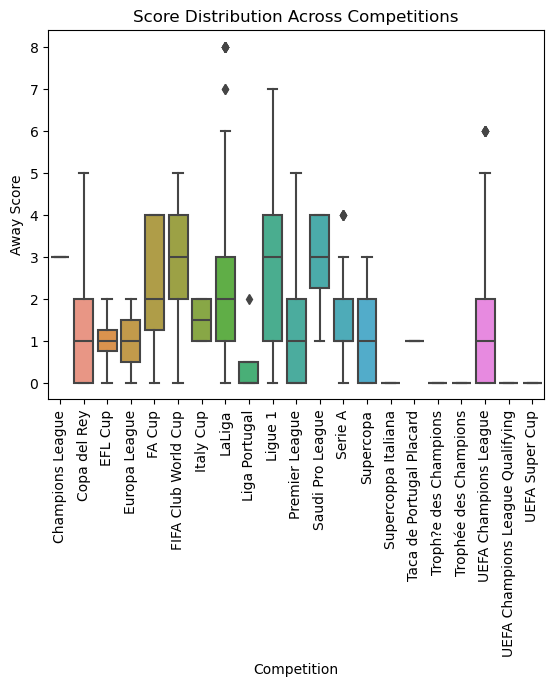

In [22]:
df['away_score'] = pd.to_numeric(df['away_score'], errors='coerce')

# Drop rows where 'home_score' is NaN
df.dropna(subset=['away_score'], inplace=True)

# Ensure 'Competition' is treated as a category
df['Competition'] = df['Competition'].astype('category')

# Create the boxplot
sns.boxplot(x='Competition', y='away_score', data=df)
plt.title('Score Distribution Across Competitions')
plt.xlabel('Competition')
plt.ylabel('Away Score')
plt.xticks(rotation=90)
plt.show()


#**BOX PLOT THAT SHOWS OUTLIERS IN THE LEAGUES AND MATCHES PLAYED AWAY**#

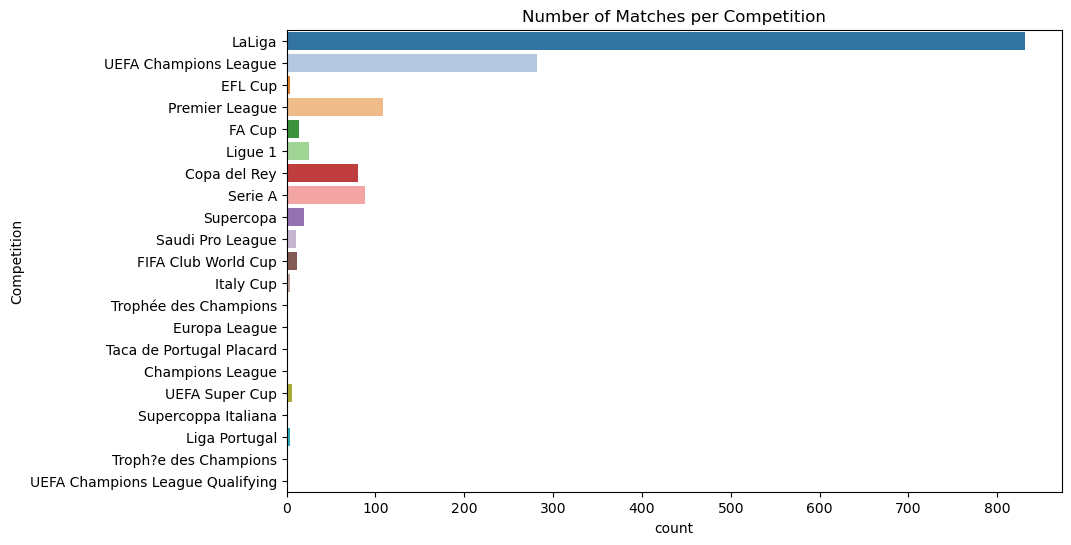

In [37]:
# Number of matches per competition
plt.figure(figsize=(10, 6))
sns.countplot(y='Competition', data=df, palette='tab20')
plt.title('Number of Matches per Competition')
plt.show()

#**LA LIGA IS THE HIGHEST PLAYED TOURNAMENT IN THE GIVEN DATA**#

/tmp/ipykernel_829/2061711370.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  H1 = df.loc[df['Venue'].isin(['H'])].count()[0]
/tmp/ipykernel_829/2061711370.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A1 = df.loc[df['Venue'].isin(['A'])].count()[0]


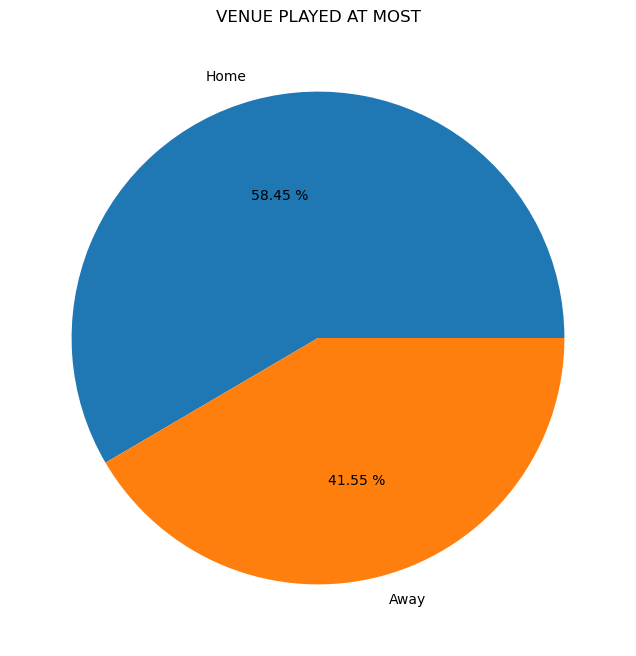

In [39]:
H1 = df.loc[df['Venue'].isin(['H'])].count()[0]
A1 = df.loc[df['Venue'].isin(['A'])].count()[0]


plt.figure(figsize = (12,8))
plt.title("VENUE PLAYED AT MOST")
plt.pie([H1,A1], autopct = "%.2f %%", labels = ['Home','Away']);

#**JUST LESS THAN 60% OF THE MATCHES A PLAYED AT HOME AND REST BEING PLAYED AWAY**#

/tmp/ipykernel_829/1792749517.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  H = df.loc[df['winning'].isin(['Home'])].count()[0]
/tmp/ipykernel_829/1792749517.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A = df.loc[df['winning'].isin(['Away'])].count()[0]
/tmp/ipykernel_829/1792749517.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  D = df.loc[df['winning'].isin(['Draw'])].count()[0]


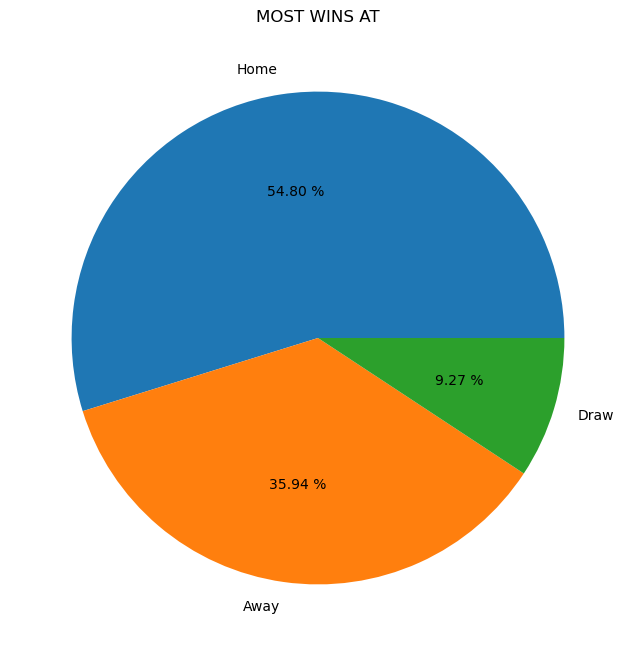

In [41]:
H = df.loc[df['winning'].isin(['Home'])].count()[0]
A = df.loc[df['winning'].isin(['Away'])].count()[0]
D = df.loc[df['winning'].isin(['Draw'])].count()[0]

plt.figure(figsize = (12,8))
plt.title("MOST WINS AT")
plt.pie([H,A,D], autopct = "%.2f %%", labels = ['Home','Away','Draw']);

#**THIS PIE CHART CLEARLY SHOWS THAT ABOUT 55% OF THE MATCHES A WON AT HOME , CLEARLY INDICATING HOME ADVANTACE AND JUST ABOVE 9% MATCHES ARE DRAW AND REST ARE LOST AT AWAY**#

(array([0, 1, 2, 3]),
 [Text(0, 0, 'FC Barcelona'),
  Text(1, 0, 'Real Madrid'),
  Text(2, 0, 'Athletic Bilbao'),
  Text(3, 0, 'Sevilla FC')])

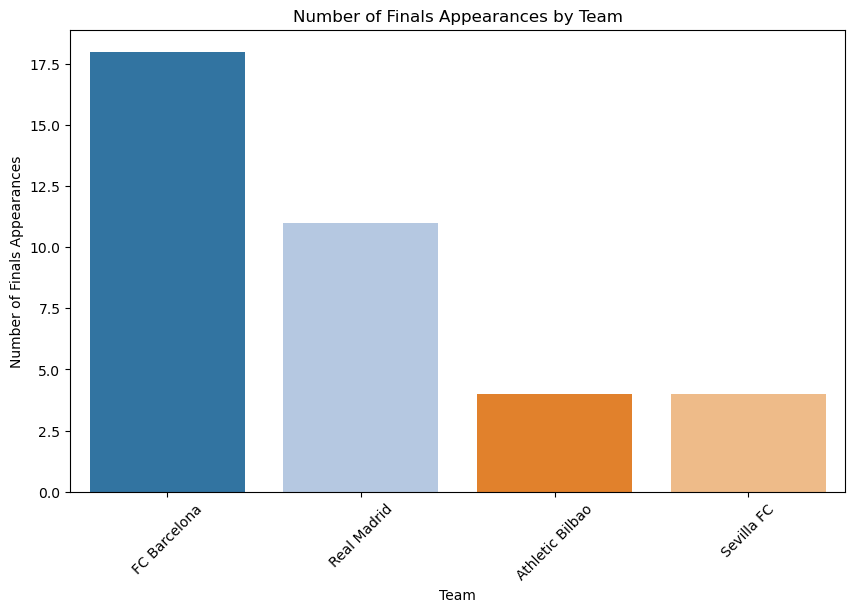

In [44]:
# Step 1: Filter only the finals
finals_df = df[df['Matchday'] == 'final']

# Step 2: Count appearances in finals for both home and away teams
home_counts = finals_df['Club'].value_counts()
away_counts = finals_df['Opponent'].value_counts()

# Step 3: Combine counts
total_counts = home_counts.add(away_counts, fill_value=0).reset_index()
total_counts.columns = ['Team', 'Finals Appearances']

# Step 4: Sort counts in descending order
total_counts = total_counts.sort_values(by='Finals Appearances', ascending=False)

# Step 5: Visualize the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Finals Appearances', data=total_counts, palette='tab20')
plt.xlabel('Team')
plt.ylabel('Number of Finals Appearances')
plt.title('Number of Finals Appearances by Team')
plt.xticks(rotation=45)

#**FR BARCELONA AND REAL MADRID ARE THE FCs MOST APPEARED IN FINALS OF ALL CHAMPIONSHIPS , INDICATING THAT THEY ARE THE MOST DOMINANT TEAMS ACROSS THE LEAGUES**#

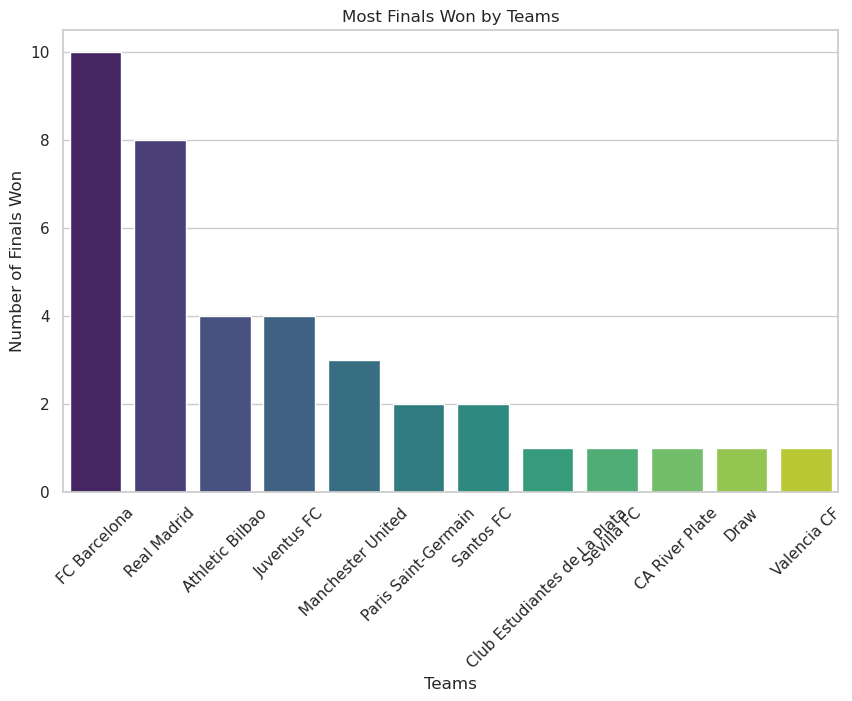

In [17]:
finals_df = df[df['Matchday'] == 'Final']
finals_wins = finals_df['Winning_Team'].value_counts().reset_index()
finals_wins.columns = ['team', 'wins']
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=finals_wins, x='team', y='wins', palette='viridis')

# Add title and labels
plt.title('Most Finals Won by Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Finals Won')
plt.xticks(rotation=45)
plt.show()

#**FC BARECLONA IS THE MOST DOMINANT TEAM ACROSS ALL LEAGUES , WINNING 10 FINALS ACROSS ALL TOURNAMENTS , FOLLOWED BY REAL MADRID (HALA MADRID) AND ATHLETIC BILBAO**#

             Competition  count
0           Copa del Rey      4
1         UEFA Super Cup      4
2  UEFA Champions League      2


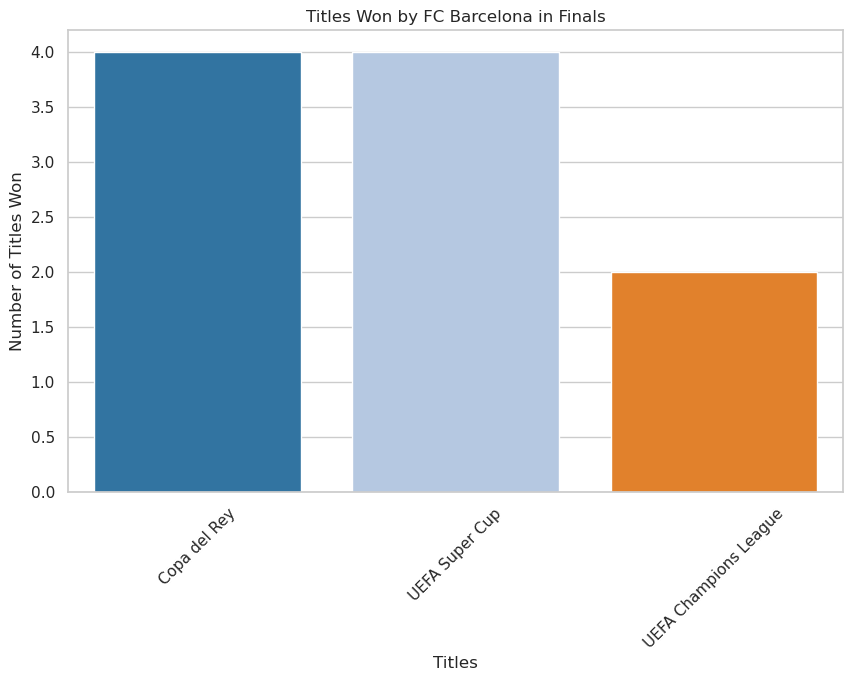

In [22]:
# Filter for finals won by FC Barcelona
barca_finals = df[(df['Winning_Team'] == 'FC Barcelona') & (df['Matchday'] == 'Final')]
# Count the number of titles won by FC Barcelona
title_counts = barca_finals['Competition'].value_counts().reset_index()
title_counts.columns = ['Competition', 'count']

# Display the counts
print(title_counts)

import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=title_counts, x='Competition', y='count', palette='tab20')

# Add title and labels
plt.title('Titles Won by FC Barcelona in Finals')
plt.xlabel('Titles')
plt.ylabel('Number of Titles Won')
plt.xticks(rotation=45)
plt.show()


#**FC BARCELONA CLEARLY DOMINATES COPA DEL REY AND UEFA SUPER CUP BY WINNING 4 TIMES IN EACH OF THE LEAGUES**#

                  Club  count
0         FC Barcelona    396
1          Real Madrid    248
2    Manchester United    100
3          Juventus FC     56
4  Paris Saint-Germain     21
5          Sporting CP      5
6          Al-Nassr FC      1


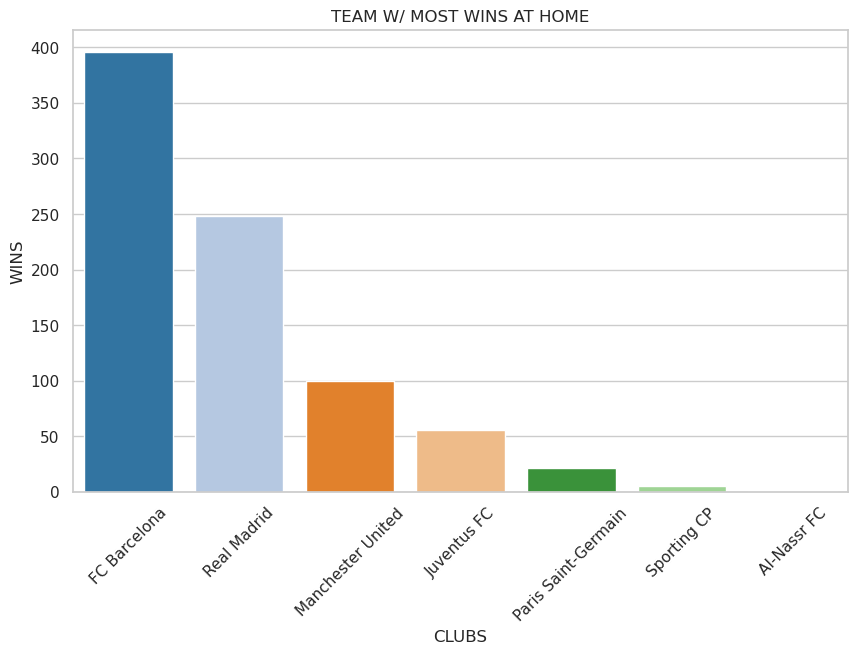

In [31]:
# Filter for finals won by FC Barcelona
home_w = df[(df['winning'] == 'Home')] 
# Count the number of titles won by FC Barcelona
home_w_counts = home_w['Club'].value_counts().reset_index()
home_w_counts.columns = ['Club', 'count']

# Display the counts
print(home_w_counts)

import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=home_w_counts, x='Club', y='count', palette='tab20')

# Add title and labels
plt.title('TEAM W/ MOST WINS AT HOME')
plt.xlabel('CLUBS')
plt.ylabel('WINS')
plt.xticks(rotation=45)
plt.show()


#**FC BARCELONA HAS THE MOST HOME ADVANTAGE WINNING JUST LESS THAN 400 MATCHES AT HOME ACROSS ALL LEAGUES FOLLOWED BY THE SECOND DOMINANT TEAM IE REAL MADRID**#

                  Club  count
0         FC Barcelona    252
1          Real Madrid    184
2    Manchester United     47
3          Juventus FC     35
4  Paris Saint-Germain     14
5          Al-Nassr FC      7
6          Sporting CP      1


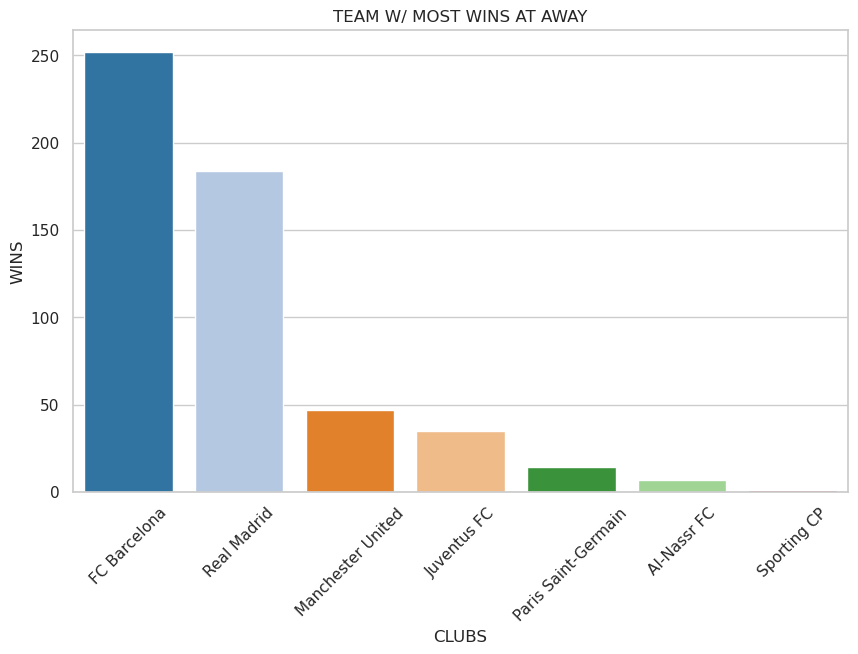

In [32]:
# Filter for finals won by FC Barcelona
home_w = df[(df['winning'] == 'Away')] 
# Count the number of titles won by FC Barcelona
home_w_counts = home_w['Club'].value_counts().reset_index()
home_w_counts.columns = ['Club', 'count']

# Display the counts
print(home_w_counts)

import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=home_w_counts, x='Club', y='count', palette='tab20')

# Add title and labels
plt.title('TEAM W/ MOST WINS AT AWAY')
plt.xlabel('CLUBS')
plt.ylabel('WINS')
plt.xticks(rotation=45)
plt.show()


#**FC BARCELONA IS AN UNDEFEATABLE UNIT BY DOMINATING AT AWAY ALSO BY WINNING JUST ABOVE 250 MATCHES AWAY, FOLLOWED OFC BY MADRID**#

                     Type  count
0        Left-footed shot    231
1       Right-footed shot     55
2                 Penalty     52
3        Direct free kick     33
4                  Header     10
5                  Tap-in      7
6         Penalty rebound      3
7  Deflected shot on goal      1
8     Counter attack goal      1
9                Solo run      1


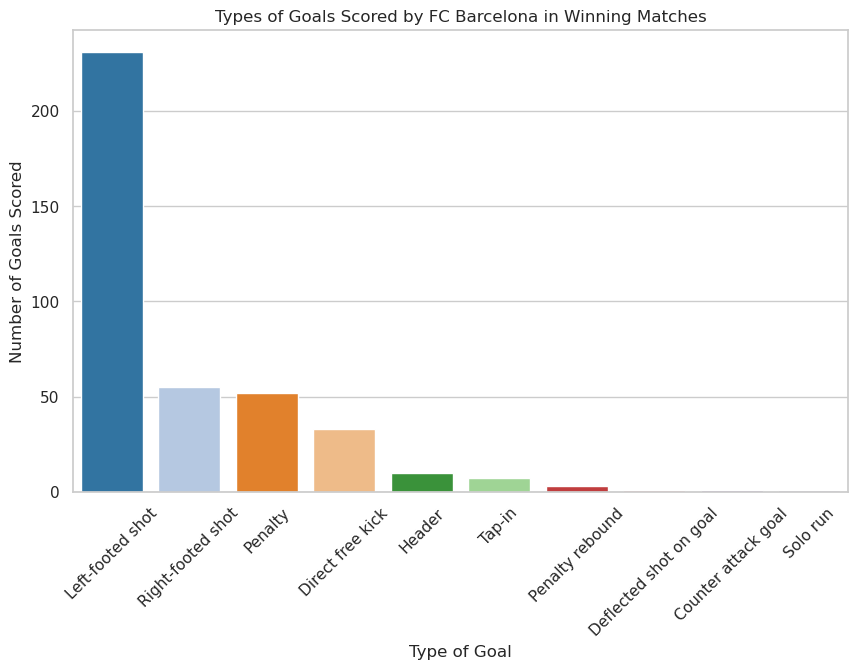

In [36]:
# Filter for FC Barcelona wins
barca_wins = df[(df['Club'] == 'FC Barcelona') & (df['Winning_Team'] == 'FC Barcelona')]
# Count the types of goals scored by FC Barcelona
goal_counts = barca_wins['Type'].value_counts().reset_index()
goal_counts.columns = ['Type', 'count']

# Display the counts
print(goal_counts)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=goal_counts, x='Type', y='count', palette='tab20')

# Add title and labels
plt.title('Types of Goals Scored by FC Barcelona in Winning Matches')
plt.xlabel('Type of Goal')
plt.ylabel('Number of Goals Scored')
plt.xticks(rotation=45)
plt.show()


#**MOST GOALS ARE SCORED LEFT FOOTED SHOTTER FOR FC BARCELONA FOLLOWED BY RIGHT-FOOTED SHOT**#

  Playing_Position  count
0               RW    178
1               CF    177
2               SS     28
3               AM     10


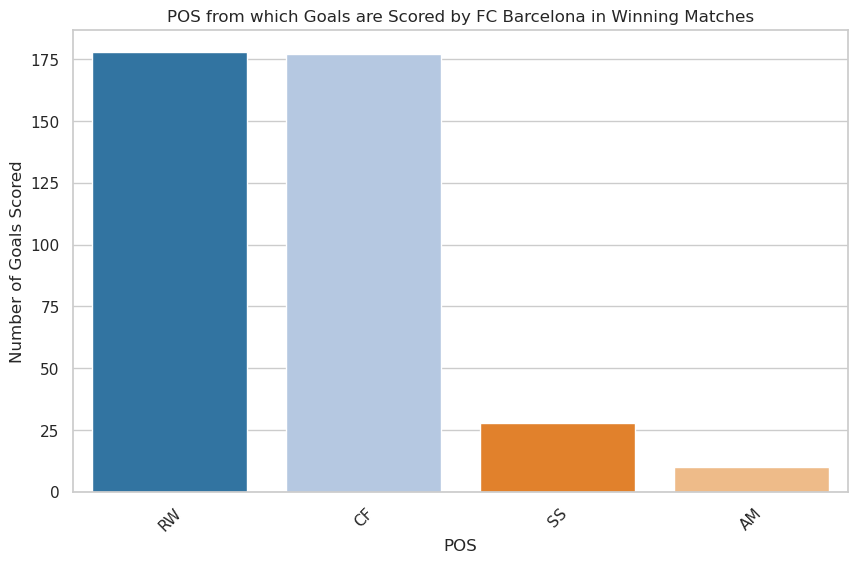

In [39]:
# Filter for FC Barcelona wins
barca_wins = df[(df['Club'] == 'FC Barcelona') & (df['Winning_Team'] == 'FC Barcelona')]
# Count the types of goals scored by FC Barcelona
POS_counts = barca_wins['Playing_Position'].value_counts().reset_index()
POS_counts.columns = ['Playing_Position', 'count']

# Display the counts
print(POS_counts)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=POS_counts, x='Playing_Position', y='count', palette='tab20')

# Add title and labels
plt.title('POS from which Goals are Scored by FC Barcelona in Winning Matches')
plt.xlabel('POS')
plt.ylabel('Number of Goals Scored')
plt.xticks(rotation=45)
plt.show()


#**MOST GOALS SCORED IN FC BARCELONA IS BY PLAYER POSITIONED AT RIGHT WING AND CENTER FRONT AND THEN FOLLOWED BY SS , THIS INDICATES THAT IF A TEAM WANTS TO WIN AGAINST BARCELONA THEY HAVE TO KEEP THEIR PLAYER MARKED AT RW AND CF OF FC BARCELONA AND AVOID THEM TO GET THE BALL**#